## Step 1: Load the Data

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("student_performance_150.csv")
df

,Name,Attendance_Percentage,Midterm_Score,Study_Hours,Health_Status,School_Type,Study_Methods,Pass/Fail
0,Lakshmi,81,67.0,5,Stressed,Government,Group study,1
1,Rohan,92,72.0,6,Healthy,Private,YouTube videos,1
2,Priya,51,41.0,12,Healthy,Government,Books only,1
3,Ananya,49,59.0,3,Stressed,Government,Ratta + coaching,1
4,Kiran,41,87.0,1,Stressed,Private,Online tests,1
...,...,...,...,...,...,...,...,...
145,Aarav,78,71.0,6,Stressed,Private,Notes + revision,1
146,Vikas,61,24.0,5,Stressed,Government,Masti 😂,1
147,Ananya,90,72.0,10,Stressed,Government,Parent's guidance,1
148,Arjun,94,44.0,7,Healthy,Private,Doubt clearing sessions,0


In [3]:
# Basic info
print("Shape:", df.shape)  # Should be (150, 8)
print("\nFirst 5 rows:")
print(df.head())



Shape: (150, 8)

First 5 rows:
      Name  Attendance_Percentage  Midterm_Score  Study_Hours Health_Status  \
0  Lakshmi                     81           67.0            5      Stressed   
1    Rohan                     92           72.0            6       Healthy   
2    Priya                     51           41.0           12       Healthy   
3   Ananya                     49           59.0            3      Stressed   
4    Kiran                     41           87.0            1      Stressed   

  School_Type     Study_Methods  Pass/Fail  
0  Government       Group study          1  
1     Private    YouTube videos          1  
2  Government        Books only          1  
3  Government  Ratta + coaching          1  
4     Private      Online tests          1  


In [4]:
# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Name                      0
Attendance_Percentage     0
Midterm_Score            15
Study_Hours               0
Health_Status             0
School_Type               0
Study_Methods             0
Pass/Fail                 0
dtype: int64


In [5]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe(include="all"))  # Include categorical columns too


Summary statistics:
         Name  Attendance_Percentage  Midterm_Score  Study_Hours  \
count     150             150.000000     135.000000   150.000000   
unique     10                    NaN            NaN          NaN   
top     Priya                    NaN            NaN          NaN   
freq       19                    NaN            NaN          NaN   
mean      NaN              70.613333      48.518519    24.686667   
std       NaN              32.211088      20.228121   139.827465   
min       NaN              -3.000000       3.000000    -4.000000   
25%       NaN              47.250000      33.500000     3.000000   
50%       NaN              69.000000      46.000000     5.000000   
75%       NaN              91.000000      63.500000     7.000000   
max       NaN             150.000000     116.000000  1000.000000   

       Health_Status School_Type Study_Methods   Pass/Fail  
count            150         150           150  150.000000  
unique             2           2        

## Step 2: Data Cleaning & Preprocessing

In [ ]:
# Handle Missing Values
>> Midterm_Score has ~15 missing values, we cannot drop it. Impute missing values using mean or median
>> Alternatively, drop rows if missing values are minimal (<5%)

In [6]:
# Impute missing Midterm_Score with median
df["Midterm_Score"].fillna(df["Midterm_Score"].median(), inplace=True)

In [ ]:
# Fix Outliers
The IQR method identifies outliers based on quartiles:

Q1 (25th percentile) : 25% of data points are ≤ Q1.
Q3 (75th percentile) : 75% of data points are ≤ Q3.
IQR = Q3 – Q1 .
Outlier bounds :
Lower bound = Q1 – 1.5 × IQR
Upper bound = Q3 + 1.5 × IQR
Any value outside these bounds is an outlier

In [ ]:
[10,12,14,15,16,18,20,22,24,25,100]

values are sorted in ascending order.

median (Q2) : The middle value is 18 .
    
Find Q1 : Median of the lower half (excluding Q2):
Lower half = [10,12,14,15,16] → Q1 = 14 .

Find Q3 : Median of the upper half (excluding Q2):
Upper half = [20,22,24,25,100] → Q3 = 24

In [7]:
# Detect outliers in "Attendance_Percentage"
Q1 = df["Attendance_Percentage"].quantile(0.25)
Q3 = df["Attendance_Percentage"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df["Attendance_Percentage"] < lower_bound) | (df["Attendance_Percentage"] > upper_bound)]
outliers

,Name,Attendance_Percentage,Midterm_Score,Study_Hours,Health_Status,School_Type,Study_Methods,Pass/Fail


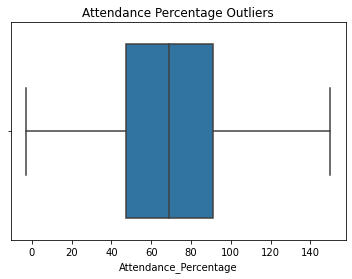

In [8]:
# 2. Detect Outliers Using Visualization

# Boxplots
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for "Attendance_Percentage"
sns.boxplot(x=df["Attendance_Percentage"])
plt.title("Attendance Percentage Outliers")
plt.show()

In [9]:
# Solutions for Handling Outliers

# 1. Remove Outliers
df_cleaned = df[(df["Attendance_Percentage"] >= lower_bound) & (df["Attendance_Percentage"] <= upper_bound)]

In [10]:
 #2. Cap/Clip Values- Replace outliers with the nearest valid value 
df["Attendance_Percentage"] = df["Attendance_Percentage"].clip(lower=0, upper=100)

In [ ]:
models (e.g., Random Forest , XGBoost ) are less sensitive to outliers. so use them.

## Step 3: Feature Engineering

In [ ]:
>> Handling Categorical Data : Encode categorical variables (e.g., Health_Status, School_Type) using techniques like label encoding or one-hot encoding.
>> Creating New Features : Derive features from existing data (e.g., interaction terms like Attendance_Percentage × Midterm_Score).
>> Feature Scaling : Normalize/standardize numerical features (e.g., Study_Hours, Midterm_Score) to ensure equal contribution to the model. 
>> Text Vectorization : Convert text (Study_Methods) into numerical features using TF-IDF or word embeddings.
>> Dimensionality Reduction : Use PCA or feature selection to reduce redundant or noisy features.

In [12]:
#Categorical Encoding
# Map categorical columns to numerical values
df["Health_Status"] = df["Health_Status"].map({"Healthy": 0, "Stressed": 1})
df["School_Type"] = df["School_Type"].map({"Government": 0, "Private": 1})

In [ ]:
Standardization:
    Transforms data to have a mean of 0 and a standard deviation of 1 (follows a standard normal distribution).

Normalization (Min-Max Scaling)
Definition : Rescales data to a fixed range (e.g., 0 to 1).

In [13]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ["Attendance_Percentage", "Midterm_Score", "Study_Hours"]

# Apply scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [14]:
df

,Name,Attendance_Percentage,Midterm_Score,Study_Hours,Health_Status,School_Type,Study_Methods,Pass/Fail
0,Lakshmi,0.529716,0.979070,-0.141264,1,0,Group study,1
1,Rohan,0.949721,1.240388,-0.134089,0,1,YouTube videos,1
2,Priya,-0.615753,-0.379782,-0.091035,0,0,Books only,1
3,Ananya,-0.692118,0.560962,-0.155615,1,0,Ratta + coaching,1
4,Kiran,-0.997576,2.024341,-0.169967,1,1,Online tests,1
...,...,...,...,...,...,...,...,...
145,Aarav,0.415169,1.188124,-0.134089,1,1,Notes + revision,1
146,Vikas,-0.233930,-1.268262,-0.141264,1,0,Masti 😂,1
147,Ananya,0.873356,1.240388,-0.105386,1,0,Parent's guidance,1
148,Arjun,1.026086,-0.222991,-0.126913,0,1,Doubt clearing sessions,0


In [15]:
df.drop(["Name","Study_Methods"], axis=1, inplace=True)

In [16]:
df

,Attendance_Percentage,Midterm_Score,Study_Hours,Health_Status,School_Type,Pass/Fail
0,0.529716,0.979070,-0.141264,1,0,1
1,0.949721,1.240388,-0.134089,0,1,1
2,-0.615753,-0.379782,-0.091035,0,0,1
3,-0.692118,0.560962,-0.155615,1,0,1
4,-0.997576,2.024341,-0.169967,1,1,1
...,...,...,...,...,...,...
145,0.415169,1.188124,-0.134089,1,1,1
146,-0.233930,-1.268262,-0.141264,1,0,1
147,0.873356,1.240388,-0.105386,1,0,1
148,1.026086,-0.222991,-0.126913,0,1,0


## Step 4: Model Training & Evaluation

In [17]:
from sklearn.model_selection import train_test_split

#Split Data into Train/Test Sets

# Define features (X) and target (y)
X = df.drop("Pass/Fail", axis=1)
y = df["Pass/Fail"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

#Train a Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [19]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.57      1.00      0.72        17

    accuracy                           0.57        30
   macro avg       0.28      0.50      0.36        30
weighted avg       0.32      0.57      0.41        30

Random Forest Performance:


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.60      0.71      0.65        17

    accuracy                           0.57        30
   macro avg       0.55      0.55      0.54        30
weighted avg       0.56      0.57      0.56        30



In [ ]:
Next Steps:
    Hyperparameter Tuning

In [ ]:
#save our model

In [22]:
import pickle

#save the model
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(lr_model, file)

In [24]:
# Save the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

In [25]:
# Load the model and scaler
with open("logistic_regression_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

with open("scaler.pkl", "rb") as scaler_file:
    scaler = pickle.load(scaler_file)

In [39]:
# Define input data
# Features: Attendance_Percentage, Midterm_Score, Study_Hours, Health_Status, School_Type
input_data = np.array([[75, 60, 5, "Healthy", "Private"]])

# Encode categorical features
# Encode categorical features using np.where
input_data[:, 3] = np.where(input_data[:, 3] == "Healthy", 0, 1)  # Health_Status
input_data[:, 4] = np.where(input_data[:, 4] == "Government", 0, 1)  # School_Type

# Convert to float for scaling
input_data = input_data.astype(float)


# Convert to float for scaling
input_data = input_data.astype(float)



# Split into numerical and categorical features
numerical_features = input_data[:, :3]  # First 3 columns: Attendance_Percentage, Midterm_Score, Study_Hours
categorical_features = input_data[:, 3:]  # Last 2 columns: Health_Status, School_Type


# Apply scaling to numerical features
scaled_numerical = scaler.transform(numerical_features)



# Combine scaled numerical and categorical features
final_input = np.hstack([numerical_features, categorical_features])

# Combine scaled numerical and categorical features
final_input = np.hstack([numerical_features, categorical_features])
# horizontally stacks (combines) two NumPy arrays-adds columns side by side

# Make prediction
prediction = model.predict(final_input)


# Interpret result
if prediction[0] == 1:
    print("Predicted that student will: Pass ")
else:
    print("Predicted that student will: Fail ")

Predicted that student will: Pass 


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [29]:
prediction=[0]>>>>>preciction[0]
prediction=[1]

2

In [ ]:
## techniques to improve performance:
1.transform/scale data
2.treat outliers
3.add new features
4.use different algorithm
5.model hyperparameter tuning
6.train on more data
7.regularization l1, l2
8.cross validation
9.use proper feature selection method:
    filter, wrapper